# Assignment 2 : CSCI 5901
----
*Submitted by:*


1.  Gaganpreet Singh (B00819217)
2.  Shruthi Kalasapura Ramesh	(B00822766)







## Question 1) Collection and Extraction



In [1]:
#Importing Libraries and dataset
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
import pandas as pd
%pprint


Pretty printing has been turned OFF


Exploring the dataset.

In [2]:
cat = ['alt.atheism',
       'talk.religion.misc',
       'comp.graphics',
       'sci.space']

allArticles = fetch_20newsgroups(subset='all',
                                 categories=cat)

# # # # # # # # # # # # # # # # # # # # # # # # # # # #
# #
# # Exploring and Analysing the dataset
# # Uncomment the below Code to understand the Dataset
# #
# # # # # # # # # # # # # # # # # # # # # # # # # # # #
# print("Lets see what does article have:")
# pprint(list(allArticles))
# print("************************************")
# print("What is in data?")
# pprint((allArticles.data[0]))
# print("************************************")
# print("What is in filenames?")
# pprint((allArticles.filenames[0]))
# print("************************************")
# print("What is in target_names?")
# pprint((allArticles.target_names))
# print("************************************")
# print("What is in target for 1st Article?")
# pprint((allArticles.target_names[allArticles.target[0]]))
# print("************************************")
# print("What is in DESCR for 1st Article?")
# print((allArticles.DESCR))
# # # # # # # # # # # # # # # # # # # # # # # # # # # #


Remove articles that are not in english language.




In [3]:
# Removing articles that are not in English Language
# !pip install langdetect
from langdetect import detect_langs

def isEnglish(string):
    res = detect_langs(string)
    for item in res:
        if item.lang == "en":
            return 1
    print(string)
    return 0

engArticles = []
for document in allArticles.data:
    if isEnglish(document):
        engArticles.append(document)


From: lochem@fys.ruu.nl (Gert-Jan van Lochem)
Subject: Dutch: symposium compacte objecten
Summary: U wordt uitgenodigd voor het symposium compacte objecten 26-4-93
Keywords: compacte objecten, symposium
Organization: Physics Department, University of Utrecht, The Netherlands
Lines: 122

Sterrenkundig symposium 'Compacte Objecten'
                                             op 26 april 1993


In het jaar 1643, zeven jaar na de oprichting van de
Universiteit van Utrecht, benoemde de universiteit haar
eerste sterrenkundige waarnemer. Hiermee ontstond de tweede
universiteitssterrenwacht ter wereld. Aert Jansz, de eerste
waarnemer, en zijn opvolgers voerden de Utrechtse sterrenkunde
in de daaropvolgende jaren, decennia en eeuwen naar de
voorhoede van het astronomisch onderzoek. Dit jaar is het 350
jaar geleden dat deze historische benoeming plaatsvond.

De huidige generatie Utrechtse sterrenkundigen en studenten
sterrenkunde, verenigd in het Sterrekundig Instituut Utrecht,
vieren de benoem

In [4]:
print("Number of Articles Dropped:",len(allArticles.data)-len(engArticles))

Number of Articles Dropped: 1


Checking if there are any duplicate articles and deleting them.

In [5]:
# to remove any duplicate articles, if they exist
engArticles = list(dict.fromkeys(engArticles))

### a) Tokenize the corpus and perform part-of-speech tagging

Tokenizing the articles into list of tokens.

In [6]:
# !pip install gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Convert each document into a list of lowercase tokens, 
# ignoring tokens that are too short.
tokens=[]
for document in engArticles:
    tokens.append(gensim.utils.simple_preprocess(document,min_len=2))
    
len(tokens)

3386

Performing Lemmatization before POS tagging.

In [7]:
from textblob import TextBlob, Word
import nltk
nltk.download('wordnet')
lemmatizedTokens = []
for line in tokens:
    lemmatizedwords = []
    for word in line:
        w = Word(word)
        
        lemmatizedwords.append(w.lemmatize())
    lemmatizedTokens.append(list(lemmatizedwords))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gaganpree99/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
#Verify that we lemmatized all documents
len(lemmatizedTokens)

3386

POS Tagging

In [9]:
nltk.download('averaged_perceptron_tagger')
tags = []
for doc in lemmatizedTokens:
  tags.append(nltk.pos_tag(doc))
print(len(tags))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gaganpree99/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


3386


In [10]:
# confirming tagging by checking 1st document 
tags[0]

[('from', 'IN'), ('healta', 'JJ'), ('saturn', 'NN'), ('wwc', 'NN'), ('edu', 'NN'), ('tammy', 'NN'), ('healy', 'NN'), ('subject', 'JJ'), ('re', 'NN'), ('who', 'WP'), ('are', 'VBP'), ('we', 'PRP'), ('to', 'TO'), ('judge', 'VB'), ('bobby', 'NN'), ('line', 'NN'), ('organization', 'NN'), ('walla', 'NN'), ('walla', 'NN'), ('college', 'NN'), ('line', 'NN'), ('in', 'IN'), ('article', 'NN'), ('apr', 'NN'), ('ultb', 'JJ'), ('isc', 'NN'), ('rit', 'NN'), ('edu', 'NN'), ('snm', 'NN'), ('ultb', 'JJ'), ('isc', 'NN'), ('rit', 'NN'), ('edu', 'NN'), ('mozumder', 'NN'), ('writes', 'VBZ'), ('from', 'IN'), ('snm', 'NN'), ('ultb', 'JJ'), ('isc', 'NN'), ('rit', 'NN'), ('edu', 'NN'), ('mozumder', 'NN'), ('subject', 'JJ'), ('re', 'NN'), ('who', 'WP'), ('are', 'VBP'), ('we', 'PRP'), ('to', 'TO'), ('judge', 'VB'), ('bobby', 'NN'), ('date', 'NN'), ('wed', 'VBD'), ('apr', 'JJ'), ('gmt', 'NN'), ('in', 'IN'), ('article', 'NN'), ('healta', 'NN'), ('saturn', 'NN'), ('wwc', 'NN'), ('edu', 'NN'), ('healta', 'NN'), ('sat

### b) Apply the techniques described in tutorial 6.

#### Bigram on the basis of Frequency Distribution

In [11]:
import itertools, nltk

def ngrams_wrapper(sent):
    return list(nltk.ngrams(sent, 2))

flat_list = [item for sublist in lemmatizedTokens for item in sublist]
bigrams = map(ngrams_wrapper, lemmatizedTokens)
bigram = list(itertools.chain.from_iterable(bigrams))
freq_dist = nltk.FreqDist(bigram)

freqTable = pd.DataFrame({'Collocation': [v for v in freq_dist.keys()], 
                          'Frequency': [k for k in freq_dist.values()]})

freqTable = freqTable.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

In [12]:
freqTable[:20]

,Collocation,Frequency
0,"(of, the)",5499
1,"(in, the)",3321
2,"(subject, re)",2449
3,"(in, article)",1970
4,"(to, the)",1888
5,"(it, is)",1875
6,"(on, the)",1787
7,"(to, be)",1727
8,"(nntp, posting)",1496
9,"(posting, host)",1493


This output is not meaningfull since it contains pronouns and Stop words. Let us try and remove these stop words.

Also, 2 word collocation should be of the format Nouns/Adjective, Noun. The following function will filter  out the bigrams that follow this rule.

In [13]:
from nltk.corpus import words as nltk_words
nltk.download('words')
# Function to filter for ADJ/NN bigrams
# The function also filters stop words
dictionary = set(nltk_words.words())

def filterNounAdj(bigram):
    for word in bigram:
        if word in gensim.parsing.preprocessing.STOPWORDS or word not in dictionary:
            return False
            
    ## A collocation may have Noun/Adjective in 1st word
    nounOrAdj = ('JJ', 
                 'JJR',
                 'JJS',
                 'NN',
                 'NNS',
                 'NNP',
                 'NNPS')
    
    ## The second word can only be noun
    nouns = ('NN',
             'NNS',
             'NNP',
             'NNPS')
    
    tags = nltk.pos_tag(bigram)
    
    if tags[0][1] in nounOrAdj and tags[1][1] in nouns:
        return True
    else:
        return False

[nltk_data] Downloading package words to
[nltk_data]     /Users/gaganpree99/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [14]:
filteredFreqDist = {}
for tuple in freq_dist:
    if filterNounAdj(tuple):
            filteredFreqDist[tuple] = freq_dist[tuple]

Sorting Biagrams on the basis of frequency and displaying top 20 results.

In [15]:
filt_FreqTable = pd.DataFrame({'Collocation': [v for v in filteredFreqDist.keys()], 
                                  'Frequency': [k for k in filteredFreqDist.values()]})

filt_FreqTable = filt_FreqTable.sort_values(by='Frequency', 
                                                  ascending=False).reset_index(drop=True)
filt_FreqTable[:20]


,Collocation,Frequency
0,"(organization, university)",495
1,"(distribution, world)",372
2,"(line, distribution)",316
3,"(newton, apple)",211
4,"(newsreader, tin)",194
5,"(henry, spencer)",180
6,"(tin, version)",164
7,"(henry, zoo)",162
8,"(university, line)",153
9,"(space, station)",139


---
##### Bigram on the basis of PMI

In [16]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

finder = nltk.collocations.BigramCollocationFinder.from_words(flat_list)
finder.apply_word_filter(lambda w: len(w) < 3 or word not in gensim.parsing.preprocessing.STOPWORDS)
finder.apply_freq_filter(20)

In [17]:
bigramPMITable = pd.DataFrame(list(finder.score_ngrams(bigram_measures.pmi)), 
                              columns=['Collocation','PMI']).sort_values(by='PMI', ascending=False)

Calling the function ```filterNounAdj``` to filter biagrams and then displaying top 20 results.




In [20]:
filt_PMITable = bigramPMITable[bigramPMITable.Collocation.map(lambda x: filterNounAdj(x))]
filt_PMITable[:20]

,Collocation,PMI
6,"(duck, pond)",15.238298
21,"(maple, circa)",14.676250
46,"(beam, jockey)",14.290164
62,"(chapel, hill)",13.976427
88,"(advisory, committee)",13.593477
103,"(tourist, bureau)",13.404011
109,"(ann, miller)",13.294462
113,"(philosophical, significance)",13.219255
114,"(cup, portal)",13.187206
125,"(allan, schneider)",13.011130


---
##### Bigram on the basis of t-test

In [21]:
bigramTtestTable = pd.DataFrame(list(finder.score_ngrams(bigram_measures.student_t)), 
                              columns=['Collocation','t-test']).sort_values(by='t-test', ascending=False)

Calling the function ```filterNounAdj``` to filter biagrams and then displaying top 20 results.

In [22]:
filt_tTable = bigramTtestTable[bigramTtestTable.Collocation.map(lambda x: filterNounAdj(x))]
filt_tTable[:20]

,Collocation,t-test
14,"(organization, university)",21.996450
19,"(distribution, world)",19.245885
27,"(line, distribution)",17.608997
56,"(newton, apple)",14.520278
70,"(newsreader, tin)",13.924899
77,"(henry, spencer)",13.410081
87,"(tin, version)",12.794010
90,"(henry, zoo)",12.720916
118,"(university, line)",11.840785
122,"(space, station)",11.738172


---
##### Bigram on the basis of chi-square



In [23]:
bigramChiTable = pd.DataFrame(list(finder.score_ngrams(bigram_measures.chi_sq)), 
                              columns=['Collocation','chi_sq']).sort_values(by='chi_sq', ascending=False)

Calling the function ```filterNounAdj``` to filter biagrams and then displaying top 20 results.

In [24]:
filt_chiTable = bigramChiTable[bigramChiTable.Collocation.map(lambda x: filterNounAdj(x))]
filt_chiTable[:20]

,Collocation,chi_sq
32,"(allan, schneider)",842037.561326
36,"(duck, pond)",811711.510816
41,"(newsreader, tin)",774354.405216
49,"(tourist, bureau)",715387.639844
60,"(beam, jockey)",641076.521562
80,"(newton, apple)",551056.588877
81,"(maple, circa)",549796.473883
93,"(chapel, hill)",499656.025147
118,"(henry, spencer)",381574.790466
122,"(jet, propulsion)",374425.678153


---
### c) How much overlap is there among the techniques? Do you think it makes sense to considerthe union of the results?
##### Bigram Comparison

In [26]:
compareBiagrams = pd.DataFrame([filt_FreqTable[:20].Collocation.values,
                               filt_PMITable[:20].Collocation.values,
                               filt_tTable[:20].Collocation.values,
                               filt_chiTable[:20].Collocation.values]).T
compareBiagrams.columns = ['basedOnFreq','basedOnPMI','basedOnt-Test','basedOnChi-Square']
compareBiagrams

,basedOnFreq,basedOnPMI,basedOnt-Test,basedOnChi-Square
0,"(organization, university)","(duck, pond)","(organization, university)","(allan, schneider)"
1,"(distribution, world)","(maple, circa)","(distribution, world)","(duck, pond)"
2,"(line, distribution)","(beam, jockey)","(line, distribution)","(newsreader, tin)"
3,"(newton, apple)","(chapel, hill)","(newton, apple)","(tourist, bureau)"
4,"(newsreader, tin)","(advisory, committee)","(newsreader, tin)","(beam, jockey)"
5,"(henry, spencer)","(tourist, bureau)","(henry, spencer)","(newton, apple)"
6,"(tin, version)","(ann, miller)","(tin, version)","(maple, circa)"
7,"(henry, zoo)","(philosophical, significance)","(henry, zoo)","(chapel, hill)"
8,"(university, line)","(cup, portal)","(university, line)","(henry, spencer)"
9,"(space, station)","(allan, schneider)","(space, station)","(jet, propulsion)"


As we can see here, the results of frequency distribution are almost similar with that of t-test.
Also, the results from Chi-Square test and PMI are more accurate even without applying the filters. 

We can definitlely combine the results of these techniques to obtain better results.

Since PMI tells us the measure of how likely the words co-occur if they were dependent it is more sesnitive towards rare combination of words. This means that a random biagram is given high significance when checked through PMI. So it makes more sense to combine the results of PMI and frequency distribution as they will give us more practical results.



---

## Question 2 

### a) Cleaning the text

The following code performs the following:


1.   Tokenize the corpus
2.   Remove the stop words
3.   Remove numbers, punctuation, special characters etc.
4.   Stemming of tokens



In [27]:
allArticles = fetch_20newsgroups(subset='all',categories=cat)

tokens=[]
for document in allArticles.data:
    tokens.append(gensim.utils.simple_preprocess(document,min_len=2))

In [28]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer("english")

stemmedTokens1 = []
for line in tokens:
    stemmedwords = []
    for word in line:
        if word not in gensim.parsing.preprocessing.STOPWORDS:        
            stemmedwords.append(stemmer.stem(WordNetLemmatizer().lemmatize(word, pos='v')))
    stemmedTokens1.append(list(stemmedwords))

stemmedTokens1[:2]

[['healta', 'saturn', 'wwc', 'edu', 'tammi', 'heali', 'subject', 'judg', 'bobbi', 'line', 'organ', 'walla', 'walla', 'colleg', 'line', 'articl', 'apr', 'ultb', 'isc', 'rit', 'edu', 'snm', 'ultb', 'isc', 'rit', 'edu', 'mozumd', 'write', 'snm', 'ultb', 'isc', 'rit', 'edu', 'mozumd', 'subject', 'judg', 'bobbi', 'date', 'wed', 'apr', 'gmt', 'articl', 'healta', 'saturn', 'wwc', 'edu', 'healta', 'saturn', 'wwc', 'edu', 'tammi', 'heali', 'write', 'bobbi', 'like', 'liberti', 'quot', 'christian', 'writer', 'name', 'ellen', 'white', 'hope', 'say', 'help', 'edit', 'remark', 'group', 'futur', 'set', 'standard', 'opinion', 'view', 'duti', 'interpret', 'scriptur', 'criterion', 'heart', 'condemn', 'come', 'ideal', 'thought', 'fromth', 'mount', 'bless', 'hope', 'quot', 'atheist', 'gag', 'think', 'ellen', 'white', 'better', 'tammi', 'point', 'peac', 'bobbi', 'mozumd', 'point', 'set', 'view', 'way', 'believ', 'say', 'eveil', 'world', 'caus', 'atheism', 'ridicul', 'dialogu', 'newsgroup', 'post', 'spirit'

### b) Bag-of-words tf-idf weighted vector representation

The cleaned text is now used to perform TF-IDF weighted vector representation

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
feature_counts = count_vect.fit_transform([' '.join(x) for x in stemmedTokens1])

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
feature_tfidf = tfidf_transformer.fit_transform(feature_counts)
feature_tfidf.shape

(3387, 26312)

### c) Split the data randomly into training and testing set (70-30 %)

The following code splits the TF-IDF representation into train and testing set:

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import time


X_train, X_test, y_train, y_test = train_test_split(feature_tfidf,
                                                    allArticles.target,
                                                    test_size=0.3,
                                                    random_state=11)

##### Train Multinomial NB and report confusion matrix



In [32]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)
print("Accuracy: " + str(round(100*(clf.score(X_test, y_test)),2))+"%")

Accuracy: 90.76%


Following function is used to plot confusion matrix of a given model.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotConfusionMatrix(model):
    y_pred = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)

    labels=allArticles.target_names
    # Plot confusion_matrix
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d", xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()



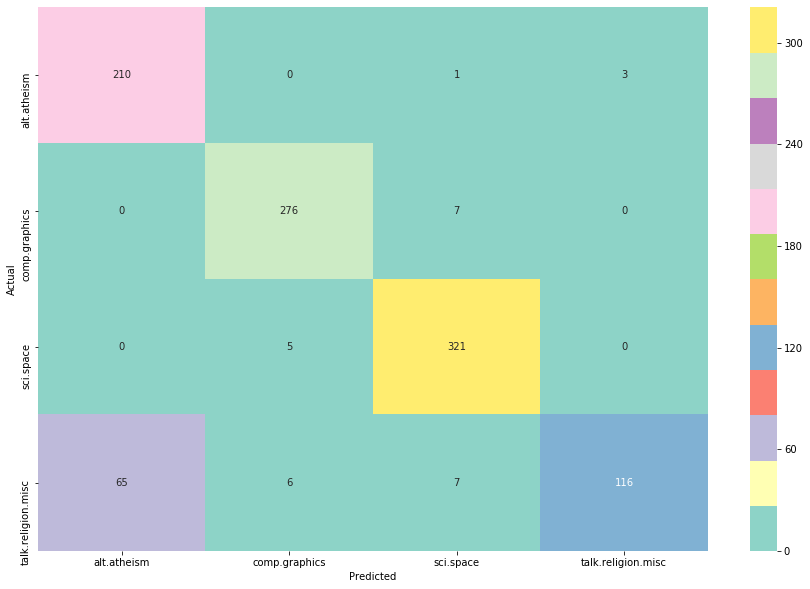

In [34]:
#Plot Confusion matrix for Multinomial Naive Based Model
plotConfusionMatrix(clf)

---

##### Train SVM and report confusion matrix.

In [35]:
from sklearn.svm import SVC
clf2 = SVC(gamma='scale').fit(X_train, y_train)
print("Accuracy: " + str(round(100*(clf2.score(X_test, y_test)),2))+"%")

Accuracy: 94.69%


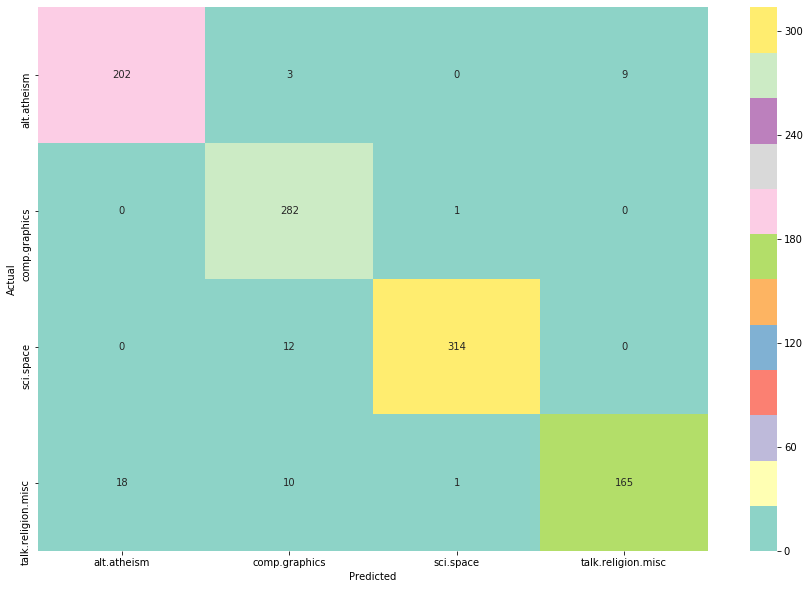

In [36]:
#Plot Confusion matrix for SVM
plotConfusionMatrix(clf2)

##### Which algorithm has higher accuracy and why?

SVM has a slight higher acuracy as compared to Naive Bayes. This can be explained as Naive Bayes treats the features points as independent, however SVM looks at the interaction between the points.

In our case since the feature points that are the tokens extracted from the document have relation among each other, hence SVM tends to perform slighly better.

Also, MNB tends to perform better on snippets than on long documents. An important point to note here is that although SVM provides a better accuracy, the execution time for MNB is way shorter than SVM. Hence, to get a accuracy improvement of ~3% we have to make a trade-off in time domain.

---
##### Changing Kernels to see if we get better results

1) with ```RBF``` Kernel

In [37]:
clf3 = SVC(kernel='rbf', gamma='scale').fit(X_train, y_train)
print("Accuracy: " + str(round(100*(clf3.score(X_test, y_test)),2))+"%")

Accuracy: 94.69%


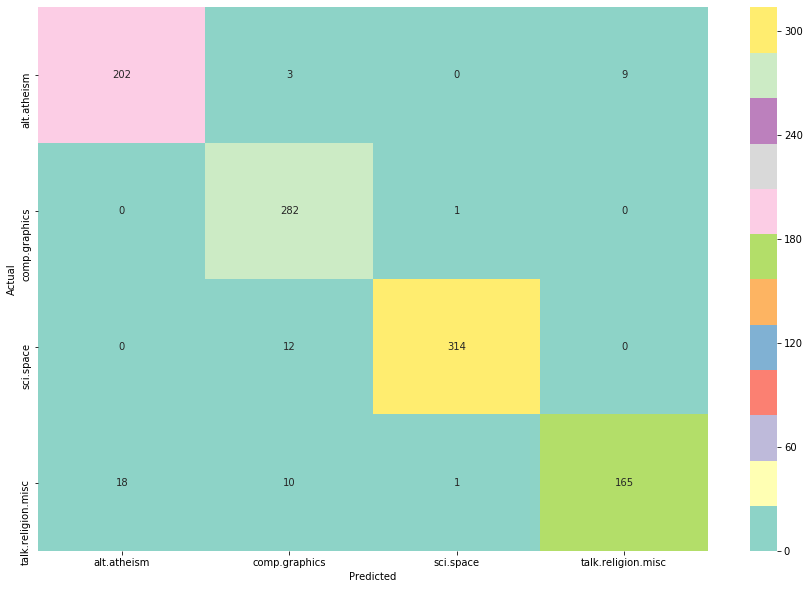

In [38]:
#Plot Confusion matrix with RBF kernel
plotConfusionMatrix(clf3)

2) with ```linear``` kernel

In [39]:
clf4 = SVC(kernel='linear', gamma='scale').fit(X_train, y_train)
print("Accuracy: " + str(round(100*(clf4.score(X_test, y_test)),2))+"%")

Accuracy: 95.48%


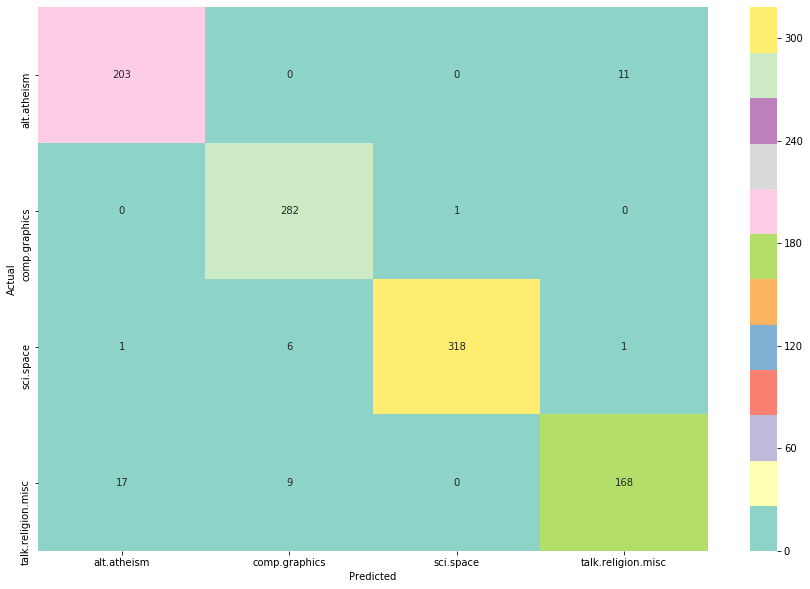

In [40]:
#Plot Confusion matrix with Linear kernel
plotConfusionMatrix(clf4)

3) with ```poly``` kernel

In [41]:
clf5 = SVC(kernel='poly', gamma='scale').fit(X_train, y_train)
print("Accuracy: " + str(round(100*(clf5.score(X_test, y_test)),2))+"%")

Accuracy: 75.71%


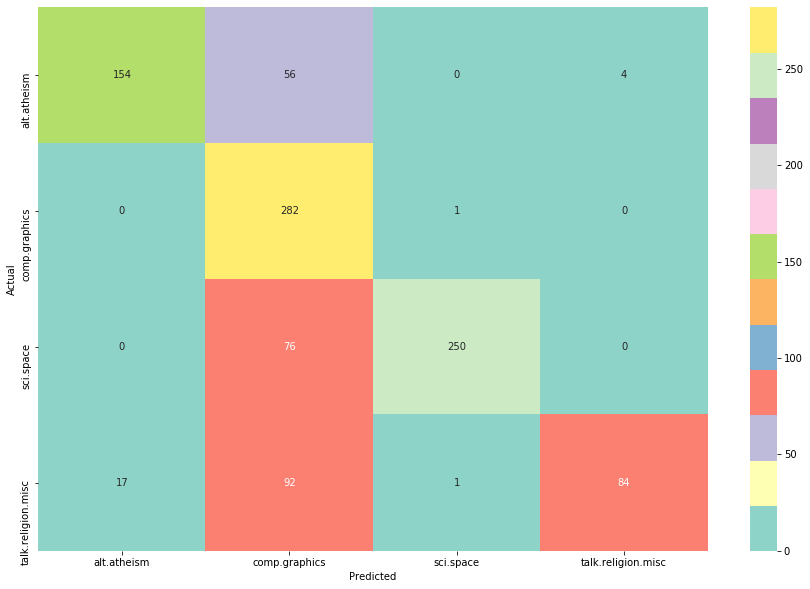

In [42]:
#Plot Confusion matrix with poly kernel
plotConfusionMatrix(clf5)

4) with ```sigmoid``` kernel

In [43]:
clf6 = SVC(kernel='sigmoid', gamma='scale').fit(X_train, y_train)
print("Accuracy: " + str(round(100*(clf6.score(X_test, y_test)),2))+"%")

Accuracy: 95.38%


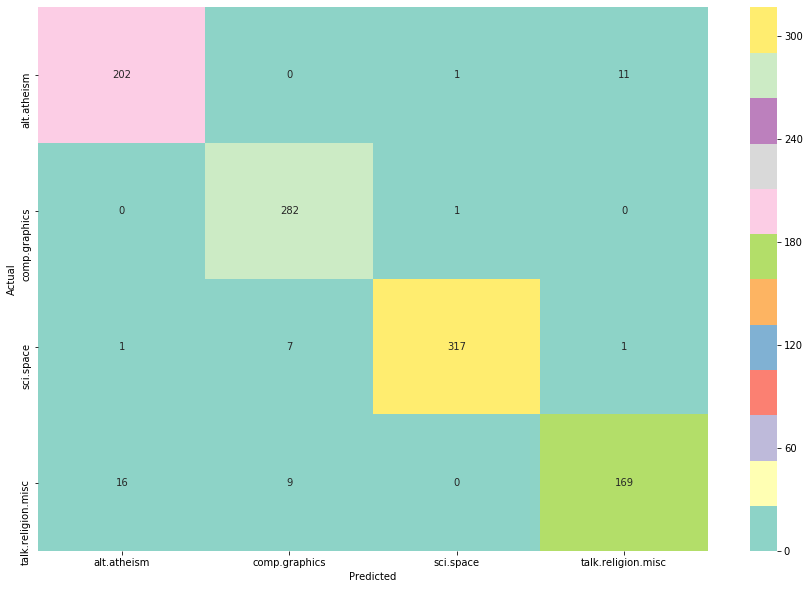

In [44]:
#Plot Confusion matrix with sigmoid kernel
plotConfusionMatrix(clf6)

As we can see, the best accuracy is achieved with ```linear``` kernel and has a accuracy of 95.48%. 
The Confusion matrix for ```linear``` kernel has least number of misclassifications.

Hence, ```linear``` kernel has the best results in comparison to other non-linear kernels.

---

### d) Perform POS tagging and perform clasification again

Fetching raw data from given dataset

In [45]:
allArticles = fetch_20newsgroups(subset='all',categories=cat)
tokens=[]
for document in allArticles.data:
    tokens.append(gensim.utils.simple_preprocess(document,min_len=2))

Perform POS Tagging on raw dataset

In [46]:
taggedTokens = []
for doc in tokens:
    tags = nltk.pos_tag(doc)
    taggedTokens.append(tags)

Extract nouns from the tagged data

In [47]:
nouns = ('NN',
         'NNS',
         'NNP',
         'NNPS')

nounTokens = []
for document in taggedTokens:
    nounsFound = []
    for taggedToken in document:
        if taggedToken[1] in nouns:
            nounsFound.append(taggedToken[0])
    nounTokens.append(nounsFound)



Repeat the steps 2(a), 2(b) and 2(c)

In [48]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer("english")

stemmedTokens2 = []
for line in nounTokens:
    stemmedwords = []
    for word in line:
        if word not in gensim.parsing.preprocessing.STOPWORDS:        
            stemmedwords.append(stemmer.stem(WordNetLemmatizer().lemmatize(word, pos='v')))
    stemmedTokens2.append(list(stemmedwords))

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
feature_counts = count_vect.fit_transform([' '.join(x) for x in nounTokens])


In [50]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
feature_tfidf = tfidf_transformer.fit_transform(feature_counts)
feature_tfidf.shape

(3387, 24713)

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import time


X_train, X_test, y_train, y_test = train_test_split(feature_tfidf,
                                                    allArticles.target,
                                                    test_size=0.3,
                                                    random_state=11)

In [52]:
from sklearn.naive_bayes import MultinomialNB
clf7 = MultinomialNB().fit(X_train, y_train)
print("Accuracy: " + str(round(100*(clf7.score(X_test, y_test)),2)))

Accuracy: 90.95


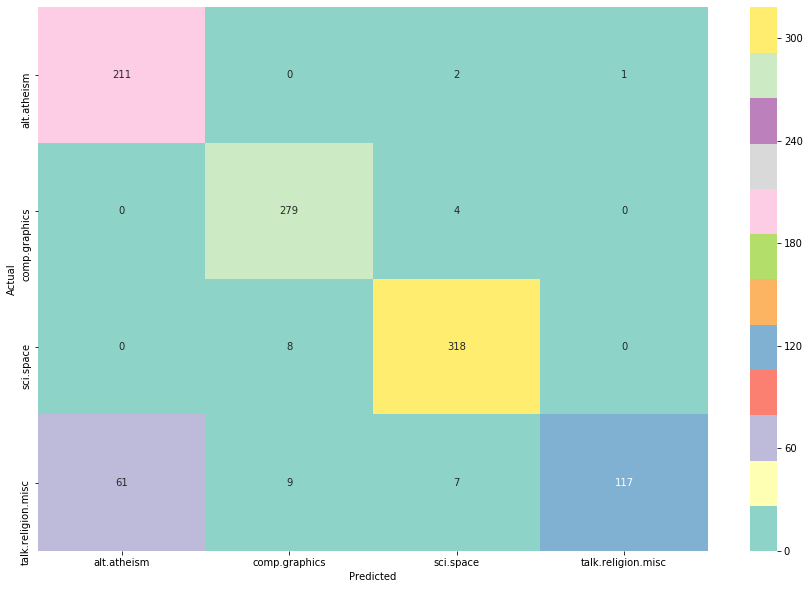

In [53]:
plotConfusionMatrix(clf7)

In [54]:
clf8 = SVC(kernel='linear', gamma='scale').fit(X_train, y_train)
print("Accuracy: " + str(round(100*(clf8.score(X_test, y_test)),2)))

Accuracy: 94.89


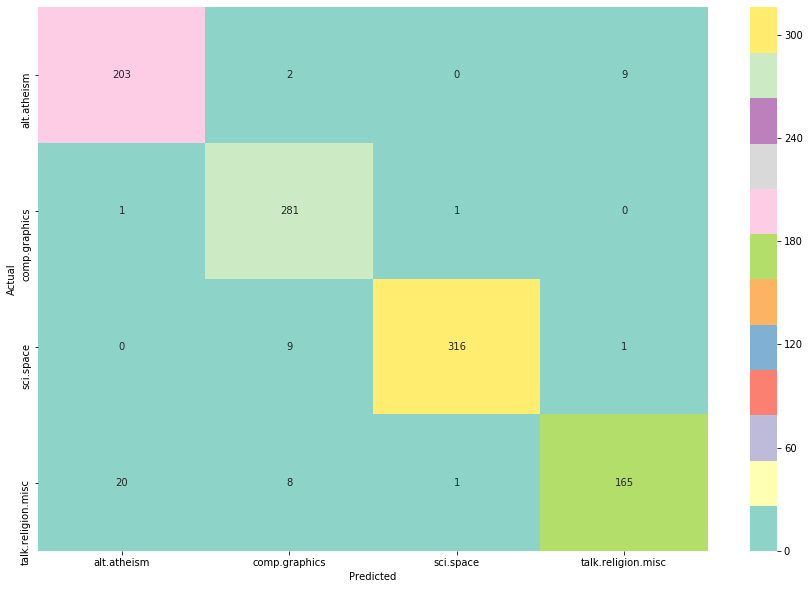

In [55]:
plotConfusionMatrix(clf8)

As we can see there is almost no change in the accuracy after POS tagging.


---
##### How does the size of the vocabulary compare with that of part (c)

In [59]:
# Vocabulary without POS tagging
count1=0
for list in stemmedTokens1:
    count1+=len(list)


In [60]:
# Vocabularywith POS tagging
count2=0
for list in stemmedTokens2:
    count2+=len(list)


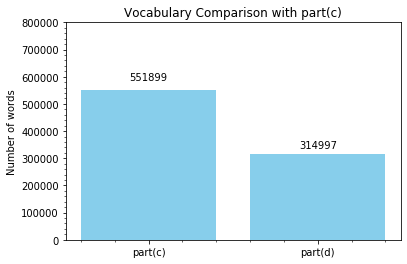

In [58]:
import numpy as np
import matplotlib.pyplot as plt
objects = ('part(c)', 'part(d)')
y_pos = np.arange(len(objects))
performance = [count1,count2]
bar = plt.bar(y_pos, performance, align='center',color='skyblue')
plt.xticks(y_pos, objects)
plt.ylabel('Number of words')
plt.title('Vocabulary Comparison with part(c)')
plt.minorticks_on()
plt.ylim(0,800000)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height), ha='center', va='bottom')

plt.show()


It is clear from the above bar plot that we have reduced the vocabulary to almost half in comparison to part(c).
There's a drop in accuracy by ~0.4%, however this is not much significant.

Since, the number of words after POS tagging are quite less, hence the model becomes quite faster.

### References

[1] NLP with the 20 Newsgroups Dataset - Rox S - Medium. (2019). Retrieved 17 July 2019, from https://medium.com/@siyao_sui/nlp-with-the-20-newsgroups-dataset-ab35cd0ea902

[2] priya-dwivedi/Deep-Learning. (2019). Retrieved 17 July 2019, from https://github.com/priya-dwivedi/Deep-Learning/blob/master/topic_modeling/LDA_Newsgroup.ipynb